In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from astropy.io import fits 
import os
import aplpy
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.path as mpath
from ltsfit.lts_linefit import lts_linefit
from openpyxl import Workbook
from astropy.coordinates import Angle
from regions import PolygonSkyRegion, PixCoord
from astropy.wcs import WCS
from matplotlib.ticker import MultipleLocator

In [2]:
# 改名
Y= 'L429'
# 读取文件
file_path = './L429'
file1_name='L429.fits'
file2_name = 'output.xlsx'
file3_name = 'CCD.pdf'
file4_name = 'CCD_err.pdf'#有误差棒的color color diagram
file5_name = 'L429.csv'
file6_name = 'L429_m.csv'
file7_name = 'output真.xlsx'
file8_name = ' Simulated_ins.pdf'
file9_name = 'B.fits'
file10_name = 'G.fits'
file11_name = 'R.fits'
file12_name = 'Dust_emission_s.fits'
file121_name = 'Dust_emission_s_coords.png'
file13_name = '三色图.png'
file14_name = '三色图带坐标.png'
# 构建文件路径
full_file1_path = os.path.join(file_path, file1_name)
full_file2_path = os.path.join(file_path, file2_name)
full_file3_path = os.path.join(file_path, file3_name)
full_file4_path = os.path.join(file_path, file4_name)
full_file5_path = os.path.join(file_path, file5_name)
full_file6_path = os.path.join(file_path, file6_name)
full_file7_path = os.path.join(file_path, file7_name)
full_file8_path = os.path.join(file_path, file8_name)
full_file9_path = os.path.join(file_path, file9_name)
full_file10_path = os.path.join(file_path, file10_name)
full_file11_path = os.path.join(file_path, file11_name)
full_file12_path = os.path.join(file_path, file12_name)
full_file121_path = os.path.join(file_path, file121_name)
full_file13_path = os.path.join(file_path, file13_name)
full_file14_path = os.path.join(file_path, file14_name)

In [3]:
df3 = pd.read_excel(full_file7_path,header=None)
print(df3.head())

     0    1              2             3           4         5         6   \
0  9039  929  18:17:07.7262  -8:18:05.045  274.282193 -8.301401  0.121563   

         7         8              9   ...     63   64  65   66   67   68  \
0  21.61635  3.756131  18:16:24.5170  ...  96.28  1.3   0  1.2 -0.2  0.4   

              69            70    71    72  
0  18:17:00.7262  -8:18:05.045  0.45  0.45  

[1 rows x 73 columns]


In [4]:
df1 = pd.read_excel(full_file2_path,header=None)
print(df1.head())

         0     1         2          3    4         5         6         7   \
0  6 arcmin  5671  18:17:06  -08:14:41  0.1  1.149882  0.519859  0.015866   

         8         9             10        11             12        13  \
0  0.004055  0.182239  1.531164e-43  0.284386  5.693896e-106  0.312739   

         14        15        16        17        18  
0  0.255019  0.006303  0.458321  0.492232  5.250897  


0.3 96.25 0.3 96.25 0.3 96.28


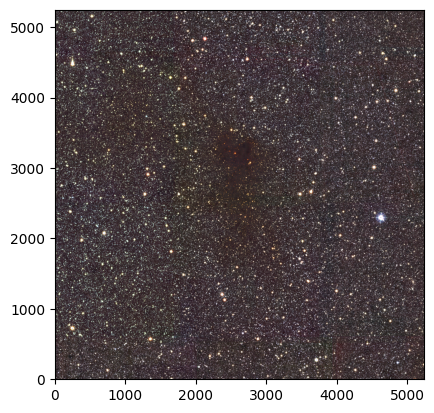

In [5]:
# %matplotlib inline
# %matplotlib ipympl
#2-93
# 修改后的 scale_image 函数
def scale_image(data, min_percent=0, max_percent=100):
    """Scale image data to 0-1 for RGB."""
    lo, hi = np.percentile(data, (min_percent, max_percent))
    return np.clip((data - lo) / (hi - lo), 0, 1)
# Load the data from the FITS files
b_data = fits.getdata(full_file9_path)
g_data = fits.getdata(full_file10_path)
r_data = fits.getdata(full_file11_path)
# Scale the data for each band 将波段堆叠成RGB数组
if df1.iloc[0, 4] < 1:
    b1=df3.iloc[0, 58]     #0.3 
    b2=df3.iloc[0, 59]     #99.66
    g1=df3.iloc[0, 60]     #0.3 
    g2=df3.iloc[0, 61]     #99.66
    r1=df3.iloc[0, 62]     #0.3
    r2=df3.iloc[0, 63]     #99.74
else:
    b1=df3.iloc[0, 60]     #0.3 
    b2=df3.iloc[0, 61]     #99.66
    g1=df3.iloc[0, 62]     #0.3 
    g2=df3.iloc[0, 63]     #99.66
    r1=df3.iloc[0, 64]     #0.3
    r2=df3.iloc[0, 65]     #99.74
# if df1.iloc[0, 4] < 1:
#     b1=0.3 
#     b2=96.58
#     g1=0.3 
#     g2=96.58
#     r1=0.3
#     r2=96.65
# else:
#     b1=0.3 
#     b2=99.66
#     g1=0.3 
#     g2=99.66
#     r1=0.3
#     r2=99.74
b_scaled = scale_image(b_data,min_percent=b1,max_percent=b2)
g_scaled = scale_image(g_data,min_percent=g1,max_percent=g2)
r_scaled = scale_image(r_data,min_percent=r1,max_percent=r2)
#min_percent和max_percent参数决定了要保留图像中亮度的哪一部分。
#例如，min_percent=0.1和max_percent=99.5意味着在缩放处理中，
#会剔除最暗的0.1%和最亮的0.5%的像素值
# 将频带堆叠成RGB数组
rgb_image = np.stack([r_scaled, g_scaled, b_scaled], axis=-1)
# 显示图像
plt.imshow(rgb_image, origin='lower')
print(b1,b2,g1,g2,r1,r2)

In [6]:
#保存三色图
plt.imsave(full_file13_path, rgb_image, origin='lower')

In [6]:
#添加修改后的坐标
i=df3.iloc[0, 2]    #'4:04:51.3308'   #ra
o=df3.iloc[0, 3]    #'+56:58:08.931'   #dec
center_edit = SkyCoord(i,o, unit=(u.hourangle, u.deg))
center_edit_ra = center_edit.ra.degree
center_edit_dec= center_edit.dec.degree
if df1.iloc[0, 4] < 1:
    radius_edit=df3.iloc[0, 6]
else:
    width_edit=df3.iloc[0, 6] *u.deg
    height_edit=df3.iloc[0, 7] *u.deg
    angle_edit = df3.iloc[0, 8] * u.deg  # 示例中的45度，可以按照需要改变这个值

# 转换到银河坐标系
galactic_coord = center_edit.galactic

# 打印银经和银纬
print(f"银经：{galactic_coord.l.degree}")
print(f"银纬：{galactic_coord.b.degree}")
print(center_edit_ra)
print(center_edit_dec)

银经：21.616349873657686
银纬：3.7561305810210652
274.2821925
-8.30140138888889


In [7]:
#如果选择的是矩形算选择区域的四个点的坐标
if df1.iloc[0, 4] > 1:   
    half_diagonal = np.sqrt((width_edit / 2)**2 + (height_edit / 2)**2)
    # 顺时针旋转后对角线与正北方向的夹角
    angle_from_north = np.arctan2(width_edit, height_edit)

    # 计算旋转后的四个角点坐标
    top_right = center_edit.directional_offset_by(angle_edit + angle_from_north, half_diagonal)
    bottom_right = center_edit.directional_offset_by(angle_edit - angle_from_north, half_diagonal)
    bottom_left = center_edit.directional_offset_by(angle_edit - angle_from_north + 180 * u.deg, half_diagonal)
    top_left = center_edit.directional_offset_by(angle_edit + angle_from_north + 180 * u.deg, half_diagonal)

    # 使用正确的顺序（顺时针）创建顶点列表
    vertices = SkyCoord([top_left.ra, bottom_right.ra, top_right.ra, bottom_left.ra],
                        [top_left.dec, bottom_right.dec,top_right.dec, bottom_left.dec],
                        frame='icrs')
    #使用正确的顺序（顶点需顺时针）创建顶点列表
    
        # 假设 vertices_list 是包含 (ra, dec) 对的列表
    vertices_list = [(vertex.ra.degree, vertex.dec.degree) for vertex in vertices]

    # 将列表转换为 NumPy 数组
    polygon = np.array(vertices_list)

    # 创建一个只包含一个 NumPy 数组的列表
    polygon_list = [polygon]

    print(polygon_list)


    

    
    # # 计算矩形区域的四个顶点坐标
    # cos_angle = np.cos(np.radians(angle_edit))
    # sin_angle = np.sin(np.radians(angle_edit))
    # half_width = width_edit/ 2 
    # half_height = height_edit / 2
    # x1 = center_edit_ra + (half_width * cos_angle) + (half_height * sin_angle)
    # y1 = center_edit_dec + (half_width * sin_angle) - (half_height * cos_angle)
    # x2 = center_edit_ra - (half_width * cos_angle) + (half_height * sin_angle)
    # y2 = center_edit_dec - (half_width * sin_angle) - (half_height * cos_angle)
    # x3 = center_edit_ra - (half_width * cos_angle) - (half_height * sin_angle)
    # y3 = center_edit_dec - (half_width * sin_angle) + (half_height * cos_angle)
    # x4 = center_edit_ra + (half_width * cos_angle) - (half_height * sin_angle)
    # y4 = center_edit_dec + (half_width * sin_angle) + (half_height * cos_angle)
    # # 定义多边形的顶点坐标
    # # y1=y1/np.cos(center_edit_dec)
    # # y2=y2/np.cos(center_edit_dec)
    # # y3=y3/np.cos(center_edit_dec)
    # # y4=y4/np.cos(center_edit_dec)
    # polygon_coords = np.array([
    #                 [x1,y1],
    #                 [x2,y2],
    #                 [x3,y3],
    #                 [x4,y4]
    #             ])
    # polygon_list = [polygon_coords]
else:
    qqq=3

In [8]:
#添加背景区域
if df1.iloc[0, 4] < 1:
    n=df3.iloc[0, 9]  #ra
    m=df3.iloc[0, 10]  #'+57:01:44.356'  #dec
    center_edit0 = SkyCoord(n,m, unit=(u.hourangle, u.deg))
    A=center_edit0.ra.degree
    B=center_edit0.dec.degree
    C=df3.iloc[0, 13] *u.deg#deg宽
    D=df3.iloc[0, 14] *u.deg#deg高
    angle0=df3.iloc[0, 15] *u.deg
else:
    n=df3.iloc[0, 11]  #ra
    m=df3.iloc[0, 12]  #'+57:01:44.356'  #dec
    center_edit0 = SkyCoord(n,m, unit=(u.hourangle, u.deg))
    A=center_edit0.ra.degree
    B=center_edit0.dec.degree
    C=df3.iloc[0, 15] *u.deg#deg宽
    D=df3.iloc[0, 16] *u.deg#deg高
    angle0=0*u.deg #df3.iloc[0, 17] *u.deg

In [10]:
if df1.iloc[0, 4] < 1:
    w1=df3.iloc[0, 71]
    h1=df3.iloc[0, 72]
else:
    w1=df3.iloc[0, 73]
    h1=df3.iloc[0, 74]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


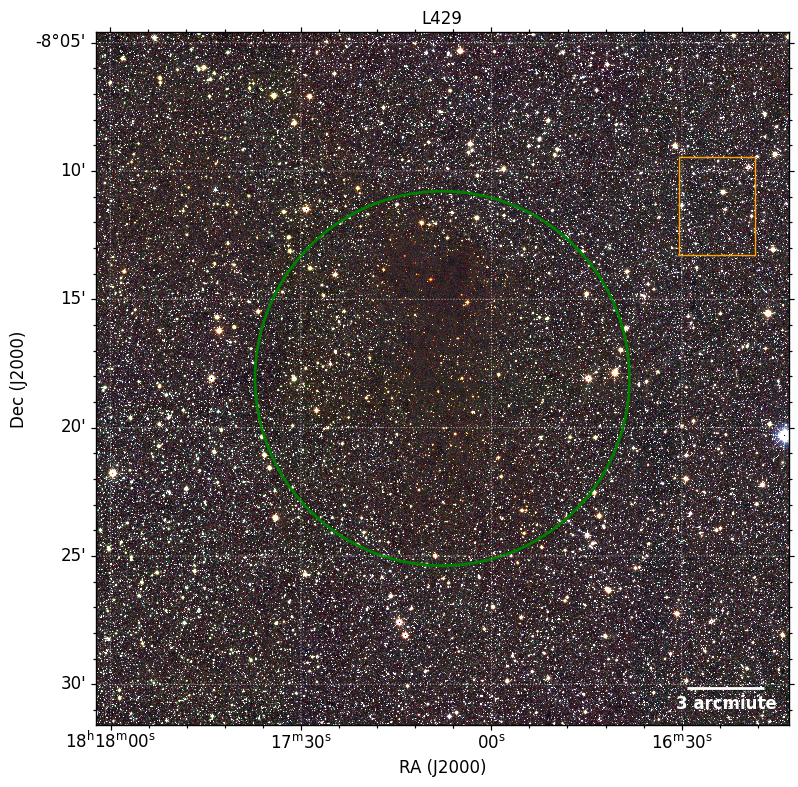

In [11]:
#假设J波段有正确的 WCS information
fig1 = aplpy.FITSFigure(full_file9_path)
fig1.show_rgb(full_file13_path)
# Recenter the figure

# fig1.recenter(339.564413, 58.869959, width=w1, height=h1)
fig1.recenter(center_edit.ra.degree, center_edit.dec.degree, width=w1, height=h1)
fig1.add_grid()
fig1.grid.show()
fig1.grid.set_color('white')
fig1.grid.set_alpha(0.6)
fig1.grid.set_linestyle('dotted')
fig1.axis_labels.set_font(size=12)
fig1.tick_labels.set_font(size=12)
fig1.set_title(Y, color='black',size=12)
# You will need to update 'length' with the actual scale length you desire
scalebar_length = 0.05  # example value in degrees
fig1.add_scalebar(length=scalebar_length)
fig1.scalebar.set_label('3 arcmiute')  # Update label with the actual length value
fig1.scalebar.set_color('white')
fig1.scalebar.set_linewidth(2)  # 设定比例尺的线条宽度为 2 点
fig1.scalebar.set_font(size='large', weight='bold')
if df1.iloc[0, 4] < 1:
  fig1.show_circles(center_edit_ra, center_edit_dec, radius_edit, edgecolor='green', linewidth=2)
else :
  fig1.show_polygons(polygon_list,edgecolor='green', linewidth=2)
  
#圈背景星
fig1.show_rectangles(A, B, C, D, 
                     0, edgecolor='orange')


plt.show(fig1)

In [12]:
# fig1.save(full_file14_path, rgb_image, origin='lower')
fig1.savefig(full_file14_path,dpi=800)


INFO: Auto-setting vmin to -1.737e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.374e+02 [aplpy.core]
INFO: Auto-setting vmin to -2.144e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.631e+02 [aplpy.core]


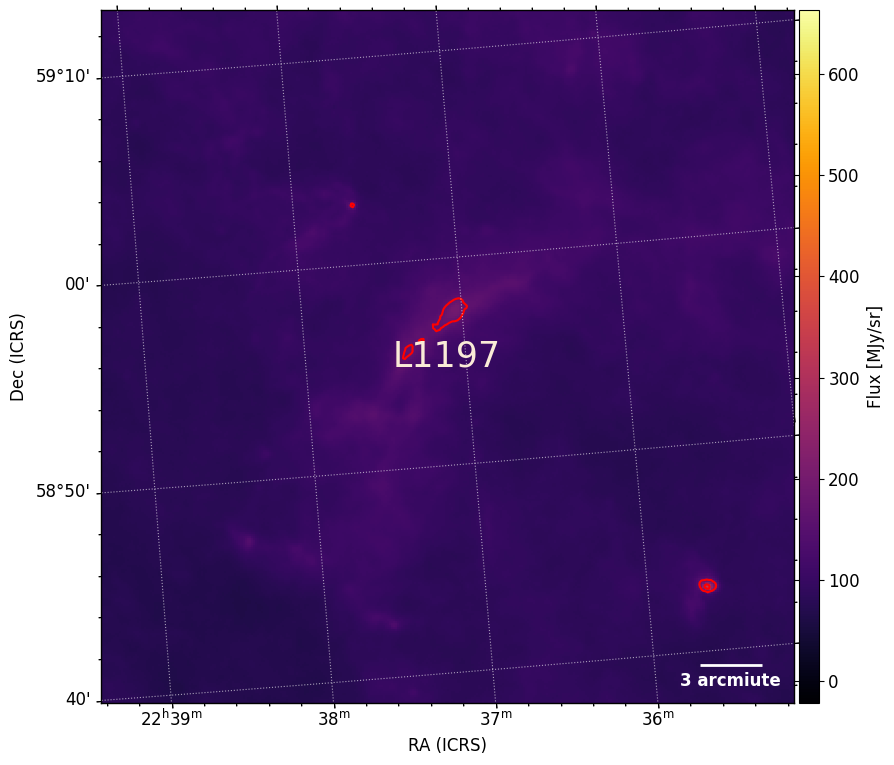

22:37:07.0261 +58:55:15.357


In [13]:

fits_file = full_file12_path
# 中心坐标
center_coord = SkyCoord(ra=i, dec=o, unit=(u.hourangle, u.deg))

# Initialize the FITS Figure
fig = aplpy.FITSFigure(fits_file,hdu=1,north=True)
# Recenter the figure

#fig1.recenter(339.564413, 58.869959, width=w1, height=h1)
fig.recenter(center_coord.ra.degree, center_coord.dec.degree, width=w1, height=h1)

# Display the image
fig.show_grayscale()

# Add grid lines
fig.add_grid()
fig.grid.show()
fig.axis_labels.set_font(size=12)
fig.tick_labels.set_font(size=12)
# Customize the grid lines
fig.grid.set_color('white')
fig.grid.set_alpha(0.6)
fig.grid.set_linestyle('dotted')
#加颜色
fig.show_colorscale(cmap='inferno',)
# Add a colorbar
fig.add_colorbar()
fig.colorbar.set_axis_label_text('Flux [MJy/sr]')
fig.colorbar.set_axis_label_font(size=12)  # 设置颜色条的文字大小，例如 'x-large'
fig.colorbar.set_font(size=12)
# ...之后的代码...
# Add contour lines based on the data
fig.show_contour(fits_file, hdu=1,colors='red')
# Add a scale bar in the bottom left corner
# You will need to update 'length' with the actual scale length you desire
scalebar_length = 0.05  # example value in degrees
fig.add_scalebar(length=scalebar_length)
fig.scalebar.set_label('3 arcmiute')  # Update label with the actual length value
fig.scalebar.set_color('white')
fig.scalebar.set_linewidth(2)  # 设定比例尺的线条宽度为 2 点
fig.scalebar.set_font(size='large', weight='bold')
# if df1.iloc[0, 4] < 1:
#   fig.show_circles(center_edit_ra, center_edit_dec, radius_edit, edgecolor='green', linewidth=2)
# else :
#   fig.show_polygons(polygon_list,edgecolor='green', linewidth=2)
  
# #圈背景星
# fig.show_rectangles(A, B, C, D, 
#                     0, edgecolor='orange')

# 在特定的天体坐标处添加文本
# 确定文本的天体坐标位置
# 确定文本的天体坐标位置
if df1.iloc[0, 4] < 1:
    text_ra =df3.iloc[0, 69] #'4:04:15.000'  # 举例天体坐标的赤经部分
    text_dec =df3.iloc[0, 70] #'+56:55:00'  # 举例天体坐标的赤纬部分
    text_coord = SkyCoord(ra=text_ra, dec=text_dec, unit=(u.hourangle, u.deg))
else:
    text_ra =df3.iloc[0, 71] #'4:04:15.000'  # 举例天体坐标的赤经部分
    text_dec =df3.iloc[0, 72] #'+56:55:00'  # 举例天体坐标的赤纬部分
    text_coord = SkyCoord(ra=text_ra, dec=text_dec, unit=(u.hourangle, u.deg))
# 添加文本
fig.add_label(text_coord.ra.degree, text_coord.dec.degree, Y, color='antiquewhite',size=25)
# Save the figure as a PNG file
fig.save(full_file121_path,dpi=300)

# Optional: Display the plot
plt.show()

print(i,o)

In [12]:
# 打开FITS文件
fits_data = fits.open(fits_file)

# 获取WCS信息
wcs_info = WCS(fits_data[1].header)  # 假设WCS信息在第二个HDU

# 检查WCS头信息
print(wcs_info)

NameError: name 'fits_file' is not defined

In [13]:


hdul = fits.open(fits_file)
print(len(hdul))  # 这会输出HDU列表的长度
hdul.info()  # 这会打印每个HDU的信息
hdul.close()

NameError: name 'fits_file' is not defined

In [14]:
# 导入CSV文件
fn = full_file5_path
df = pd.read_csv(fn, sep="\\s+")
df.to_csv(full_file6_path, sep=",")

num_lines = len(df)
print("CSV文件的行数：", num_lines)

/var/folders/cr/f8bl57c96mld5l2bbyn2jc8m0000gn/T/ipykernel_6252/213579432.py:3: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, sep="\\s+")


CSV文件的行数： 195508


/var/folders/cr/f8bl57c96mld5l2bbyn2jc8m0000gn/T/ipykernel_6252/1553537968.py:2: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_file6_path)


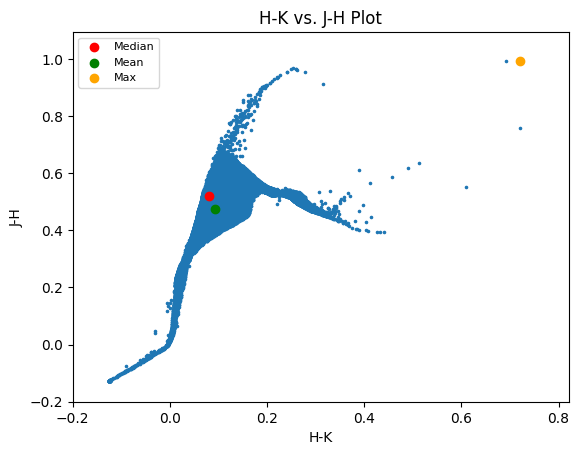

In [15]:
# 读取csv文件
df = pd.read_csv(full_file6_path)
# 按照列名选取指定列，并计算行数
j_col = df["J"]
h_col = df["H"]
k_col = df["K"]
num_rows = len(j_col)
# 计算H-K和J-H
h_k = h_col - k_col
j_h = j_col - h_col
# 计算中值、平均值和最大值、标准差
h_k_median = h_k.median()
j_h_median = j_h.median()
h_k_mean = h_k.mean()
j_h_mean = j_h.mean()
h_k_max = h_k.max()
j_h_max = j_h.max()
h_k_std = h_k.std()
j_h_std = j_h.std()
# 绘制散点图
plt.scatter(h_k,j_h,s=10,marker='.')
plt.scatter(h_k_median, j_h_median, color='red', label='Median')
plt.scatter(h_k_mean, j_h_mean, color='green', label='Mean')
plt.scatter(h_k_max, j_h_max, color='orange', label='Max')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(-0.2,h_k_max+0.1)
plt.ylim(-0.2,j_h_max+0.1)
plt.xlabel("H-K")
plt.ylabel("J-H")
plt.title("H-K vs. J-H Plot")
plt.savefig(full_file8_path)

In [16]:
hdu = fits.open(full_file1_path)
hdu.info()
data=hdu[1].data
#改列名字
data.columns['RA'].name = 'RA'
data.columns['DEC'].name = 'DE'
data.columns['HHALLMAG'].name = 'Hmag'
data.columns['JHALLMAG'].name = 'Jmag'
data.columns['KHALLMAG'].name = 'Kmag'
#data.columns['PSTAR'].name = 'PSTAR'
data.columns['HHALLMAGERR'].name = 'e_Hmag'
data.columns['JHALLMAGERR'].name = 'e_Jmag'
data.columns['KHALLMAGERR'].name = 'e_Kmag'
#data.columns['e_Kmag1'].name = 'e_Kmag'
#data.columns['e_Kmag1'].name = 'e_Kmag'
data['RA'] = data['RA']*180/np.pi
data['DE'] = data['DE']*180/np.pi
#弧度转角度
print(data['DE'], 'len:', len(data))
print(data['RA'], 'len:', len(data))

Filename: ./L429/L429.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU   1019   986837R x 192C   [1K, 1J, 1K, 1D, 1D, 1E, 1E, 1D, 1E, 1E, 1E, 1E, 1E, 1I, 1D, 1D, 1D, 1K, 1D, 1D, 1D, 1D, 1K, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1J, 1J, 1I, 1E, 1J, 1J, 1E, 1E, 1D]   
[[-8.70089433]
 [-8.70136304]

In [17]:
#筛选参考天区内的数据
with fits.open(full_file12_path) as hdulist:
        # 获取第一幅图像的头部信息
        header = hdulist[0].header

        # 从头部信息中创建WCS对象
        wcs = WCS(header)
    # 给定数据的RA和Dec列
data_ra_deg = data['RA'][:, 0] * u.deg
data_dec_deg = data['DE'][:, 0] * u.deg


    # 创建数据点的SkyCoord对象
data_coords = SkyCoord(ra=data_ra_deg, dec=data_dec_deg, frame='icrs')

    # 中心点坐标，这里假设已经有了center_edit_ra和center_edit_dec
center_c0 = SkyCoord(ra=A*u.deg, dec=B*u.deg)
# #把我圈的区域搞成一个数据集
half_diagonal0 = np.sqrt((C / 2)**2 + (D / 2)**2)
angle_from_north0 = np.arctan2(C, D)

    # 计算旋转后的四个角点坐标
top_right0 = center_edit0.directional_offset_by(angle0 + angle_from_north0, half_diagonal0)
bottom_right0 = center_edit0.directional_offset_by(angle0 - angle_from_north0, half_diagonal0)
bottom_left0 = center_edit0.directional_offset_by(angle0 - angle_from_north0 + 180 * u.deg, half_diagonal0)
top_left0 = center_edit0.directional_offset_by(angle0 + angle_from_north0 + 180 * u.deg, half_diagonal0)

    # 使用正确的顺序（顺时针）创建顶点列表
vertices0 = SkyCoord([top_left0.ra, bottom_right0.ra, top_right0.ra, bottom_left0.ra],
                        [top_left0.dec, bottom_right0.dec,top_right0.dec, bottom_left0.dec],
                        frame='icrs')

 # 创建多边形区域
polygon_region0 = PolygonSkyRegion(vertices=vertices0)

    # 创建SkyCoord对象，包含数据点的坐标
data_coords0 = SkyCoord(ra=data['RA']*u.deg, dec=data['De']*u.deg, frame='icrs')

    # 确定数据点是否在多边形区域内
mask_polygon0 = polygon_region0.contains(data_coords, wcs)
    # 掩码转换为索引数组
indices0 = np.where(mask_polygon0)[0]

    # 使用索引数组筛选数据
data_within_polygon0 = data[indices0]
        # 得到布尔掩码后，使用 np.where 将它转换为索引
indices0 = np.where(mask_polygon0)[0]

    # 使用这些索引来筛选 data
data1 = data[indices0]

# cos_angle0 = np.cos(np.radians(angle0))
# sin_angle0 = np.sin(np.radians(angle0))
# half_width0 = C / 2
# half_height0 = D / 2
# x10 = A + C.value * cos_angle0 + D.value * sin_angle0
# y10 = B + C.value * sin_angle0 - D.value * cos_angle0
# x20 = A - C.value * cos_angle0 + D.value * sin_angle0
# y20 = B - C.value * sin_angle0 - D.value * cos_angle0
# x30 = A - C.value * cos_angle0 - D.value * sin_angle0
# y30 = B - C.value * sin_angle0 + D.value * cos_angle0
# x40 = A + C.value * cos_angle0 - D.value * sin_angle0
# y40 = B + C.value * sin_angle0 + D.value * cos_angle0
# # 定义多边形的顶点坐标
# polygon_coords = np.array([
#     [x10,y10],
#     [x20,y20],
#     [x30,y30],
#     [x40,y40]
# ])
# # 根据多边形顶点坐标创建Path对象
# polygon_path = mpath.Path(polygon_coords)
# # 检查数据点是否在多边形内
# mask_region = polygon_path.contains_points(np.column_stack((data['RA'][:,0], data['DE'][:,0])))
# # 根据筛选结果选择数据
# data1 = data[mask_region]

print("位于参考天区形内的数据形状:", data1.shape)

data1.shape

Set MJD-END to 55986.868957 from DATE-END'. [astropy.wcs.wcs]


位于参考天区形内的数据形状: (3016,)


(3016,)

In [18]:
#筛选绿色的数据
if df1.iloc[0, 4] < 1:
    # 计算数据点到中心点的角距离
    data_ra_deg = data['RA'][:, 0]* u.deg  # 这是我的数据中的 RA 列
    data_dec_deg = data['DE'][:, 0] * u.deg # 这是我的数据中的 Dec 列
    center_c = SkyCoord(ra=center_edit_ra*u.deg, dec=center_edit_dec*u.deg)
    data_c = SkyCoord(data_ra_deg, data_dec_deg, unit=u.deg)
    angular_separation = center_c.separation(data_c)
    # 筛选出落在指定半径内的数据
    mask_circle = angular_separation < radius_edit * u.deg
    data = data[mask_circle]
    print("位于圆内的数据形状:", data.shape)
    print(center_c)
else:
#     with fits.open(full_file9_path) as hdulist:
#         # 获取第一幅图像的头部信息
#         header = hdulist[0].header

#         # 从头部信息中创建WCS对象
#         wcs = WCS(header)
    # 给定数据的RA和Dec列
    data_ra_deg = data['RA'][:, 0] * u.deg
    data_dec_deg = data['DE'][:, 0] * u.deg

    # 创建数据点的SkyCoord对象
    data_coords = SkyCoord(ra=data_ra_deg, dec=data_dec_deg, frame='icrs')

    # 中心点坐标，这里假设已经有了center_edit_ra和center_edit_dec
    center_c = SkyCoord(ra=center_edit_ra*u.deg, dec=center_edit_dec*u.deg)
    
    half_diagonal = np.sqrt((width_edit / 2)**2 + (height_edit / 2)**2)
    # 顺时针旋转后对角线与正北方向的夹角
    angle_from_north = np.arctan2(width_edit, height_edit)

    # 计算旋转后的四个角点坐标
    top_right = center_edit.directional_offset_by(angle_edit + angle_from_north, half_diagonal)
    bottom_right = center_edit.directional_offset_by(angle_edit - angle_from_north, half_diagonal)
    bottom_left = center_edit.directional_offset_by(angle_edit - angle_from_north + 180 * u.deg, half_diagonal)
    top_left = center_edit.directional_offset_by(angle_edit + angle_from_north + 180 * u.deg, half_diagonal)

    vertices = SkyCoord([top_left.ra, bottom_right.ra, top_right.ra, bottom_left.ra],
                        [top_left.dec, bottom_right.dec,top_right.dec, bottom_left.dec],
                        frame='icrs')
       # 创建多边形区域
    polygon_region = PolygonSkyRegion(vertices=vertices)

    # 创建SkyCoord对象，包含数据点的坐标
    data_coords = SkyCoord(ra=data['RA']*u.deg, dec=data['De']*u.deg, frame='icrs')

    # 确定数据点是否在多边形区域内
    mask_polygon = polygon_region.contains(data_coords, wcs)
    # 掩码转换为索引数组
    indices = np.where(mask_polygon)[0]

    # 使用索引数组筛选数据
    data_within_polygon = data[indices]
        # 得到布尔掩码后，使用 np.where 将它转换为索引
    indices = np.where(mask_polygon)[0]

    # 使用这些索引来筛选 data
    data = data[indices]


    print("位于多边形内的数据形状:", data.shape)
# # 计算矩形区域的四个顶点坐标
#     cos_angle = np.cos(np.radians(angle_edit))
#     sin_angle = np.sin(np.radians(angle_edit))
#     half_width = width_edit/ 2
#     half_height = height_edit / 2
#     x1 = center_edit_ra + half_width * cos_angle + half_height * sin_angle
#     y1 = center_edit_dec + half_width * sin_angle - half_height * cos_angle
#     x2 = center_edit_ra - half_width * cos_angle + half_height * sin_angle
#     y2 = center_edit_dec - half_width * sin_angle - half_height * cos_angle
#     x3 = center_edit_ra - half_width * cos_angle - half_height * sin_angle
#     y3 = center_edit_dec - half_width * sin_angle + half_height * cos_angle
#     x4 = center_edit_ra + half_width * cos_angle - half_height * sin_angle
#     y4 = center_edit_dec + half_width * sin_angle + half_height * cos_angle
#     # 定义多边形的顶点坐标
#     polygon_coords = np.array([
#         [x1,y1],
#         [x2,y2],
#         [x3,y3],
#         [x4,y4]
#     ])
#     # 根据多边形顶点坐标创建Path对象
#     polygon_path = mpath.Path(polygon_coords)
#     # 检查数据点是否在多边形内
#     mask_region = polygon_path.contains_points(np.column_stack((data['RA'][:,0], data['DE'][:,0])))
#     # 根据筛选结果选择数据
#     data = data[mask_region]

位于圆内的数据形状: (33262,)
<SkyCoord (ICRS): (ra, dec) in deg
    (274.2821925, -8.30140139)>


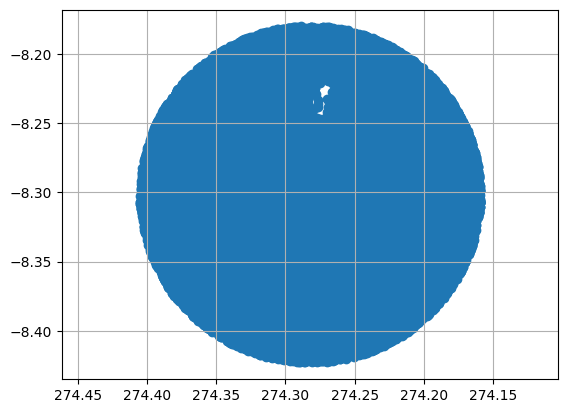

In [19]:
   
qq = data['RA']  # 赤经数据，度数制
pp = data['DE']  # 赤纬数据，度数制
plt.scatter(qq, pp)
plt.grid(True)
plt.axis('equal')
plt.gca().invert_xaxis()
plt.show()  

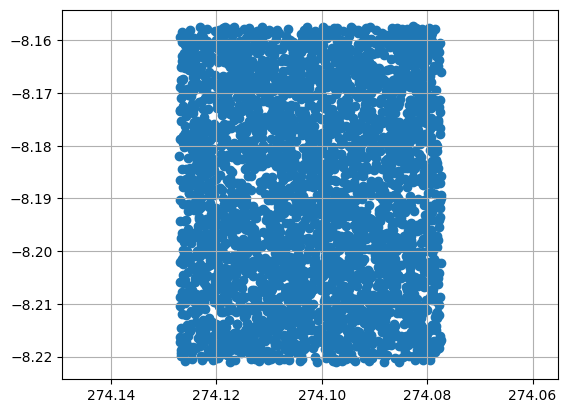

In [20]:
#假设data是一个有ra和dec的字典或者相似的数据结构
qq = data1['RA']  # 赤经数据，度数制
pp = data1['DE']  # 赤纬数据，度数制

# 绘制散点图
plt.scatter(qq, pp)
# 显示网格
plt.grid(True)
plt.axis('equal')
plt.gca().invert_xaxis()
# 显示图像
plt.show()  

In [21]:
data['Jmag'][data['Jmag']<1e-7]=np.nan
data['e_Jmag'][data['e_Jmag']<1e-7]=np.nan
data['Hmag'][data['Hmag']<1e-7]=np.nan
data['e_Hmag'][data['e_Hmag']<1e-7]=np.nan
data['Kmag'][data['Kmag']<1e-7]=np.nan
data['e_Kmag'][data['e_Kmag']<1e-7]=np.nan

In [22]:
data1['Jmag'][data1['Jmag']<1e-7]=np.nan
data1['e_Jmag'][data1['e_Jmag']<1e-7]=np.nan
data1['Hmag'][data1['Hmag']<1e-7]=np.nan
data1['e_Hmag'][data1['e_Hmag']<1e-7]=np.nan
data1['Kmag'][data1['Kmag']<1e-7]=np.nan
data1['e_Kmag'][data1['e_Kmag']<1e-7]=np.nan

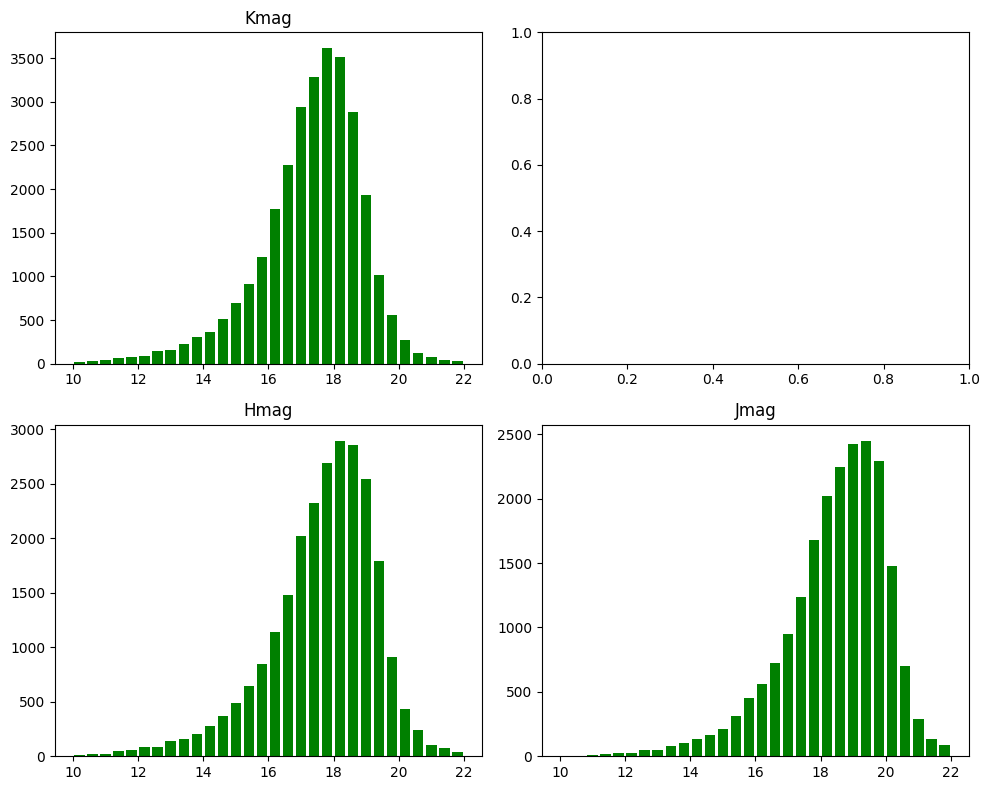

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 创建一个2x2的子图布局
# 子图1
axs[0, 0].hist(data['Kmag'], bins=30, range=(10, 22), color='green', rwidth=0.8)
axs[0, 0].set_title('Kmag')
# 子图3
axs[1, 0].hist(data['Hmag'], bins=30, range=(10, 22), color='green', rwidth=0.8)
axs[1, 0].set_title('Hmag')
# 子图4
axs[1, 1].hist(data['Jmag'], bins=30, range=(10, 22), color='green', rwidth=0.8)
axs[1, 1].set_title('Jmag')
plt.tight_layout()  # 调整子图之间的间距
plt.show()

In [24]:
data.shape

(33262,)

In [25]:
data1.shape

(3016,)

In [48]:
#挑子集
#当数据不是来源于topcoat时，要加[:,0]，such as (data['JHALLMAGERR'][:,0]<error_cut)
error_cut = 0.1
subset = ((data['e_Jmag'][:,0]<error_cut) & 
         (data['e_Hmag'][:,0]<error_cut) &
         (data['e_Kmag'][:,0]<error_cut)&(data['PSTAR'][:,0]>0.9))

data=data[subset]
data.shape

(2025,)

In [29]:
#为我圈的圆挑子集

subset1 = ((data1['e_Jmag'][:,0]<error_cut) & 
         (data1['e_Hmag'][:,0]<error_cut) &
         (data1['e_Kmag'][:,0]<error_cut)&(data1['PSTAR'][:,0]>0.9))

data1=data1[subset1]
data1.shape

(625,)

In [30]:
hmk = data['Hmag'] - data['Kmag'] 
jmh = data['Jmag'] - data['Hmag'] 
hmk1 = data1['Hmag'] - data1['Kmag'] 
jmh1 = data1['Jmag'] - data1['Hmag'] 
hmk_err = np.sqrt(data['e_Hmag']**2+ data['e_Kmag']**2)
jmh_err = np.sqrt(data['e_Jmag']**2 + data['e_Hmag']**2)
hmk_err1 = np.sqrt(data1['e_Hmag']**2+ data1['e_Kmag']**2)
jmh_err1 = np.sqrt(data1['e_Jmag']**2 + data1['e_Hmag']**2)

In [31]:
mask = (hmk !=np.nan) & (hmk_err!=np.nan) & (jmh != np.nan) & (jmh_err != np.nan)
hmk = hmk[mask]
hmk_err = hmk_err[mask]
jmh = jmh[mask]
jmh_err = jmh_err[mask]

mask1 = (hmk1 !=np.nan) & (hmk_err1!=np.nan) & (jmh1 != np.nan) & (jmh_err1 != np.nan)
hmk1 = hmk1[mask1]
hmk_err1 = hmk_err1[mask1]
jmh1 = jmh1[mask1]
jmh_err1 = jmh_err1[mask1]


In [32]:
print(data.shape)
print(data1.shape)

(5924,)
(625,)


sig_int:     0.0000      4.2589
Computing sig_int
sig_int:     0.0000      4.2589
sig_int:     0.2724     -0.2692
sig_int:     0.2562     -0.1783
sig_int:     0.2257      0.0519
sig_int:     0.2326     -0.0047
sig_int:     0.2320     -0.0002
sig_int:     0.2319      0.0008
Computing sig_int error
sig_int:     0.2320      0.0191
sig_int:     0.2724     -0.2499
sig_int:     0.2349     -0.0033
sig_int:     0.2344     -0.0000
sig_int:     0.2343      0.0009
Repeat at best fitting solution
sig_int:     0.2320     -0.0002

################# Values and formal errors ################

        a =  1.0363 +/- 0.0033
      b_0 =  0.666 +/- 0.014
  scatter =  0.2320 +/- 0.0024
Observed rms scatter: 0.24
y = a + (x_0 - p_0) b_0
   p_0 = 0.4276
Adopted clip = 2.60*sigma
Non-clipped Spearman r = 0.31 and p = 2.4e-136
Non-clipped Pearson r = 0.17 and p = 7.5e-42
Execution time 37.01 s

###########################################################



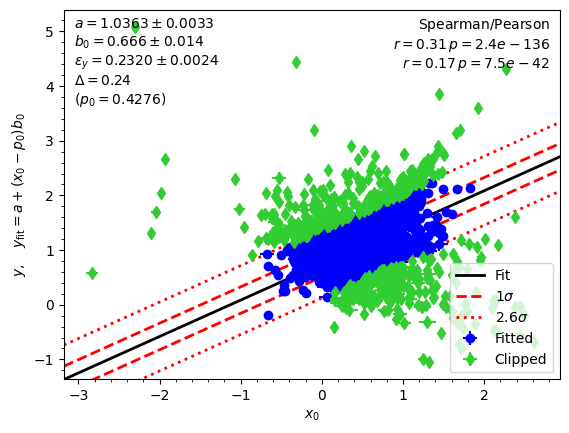

In [33]:
#剔除3sigma
p = lts_linefit(hmk, jmh,sigx=hmk_err,sigy=jmh_err,pivot=np.median(hmk))
#########
pivot=np.median(hmk)

In [34]:
from scipy.stats import gaussian_kde
xy=np.vstack([hmk, jmh])
z=gaussian_kde(xy)(xy)

In [35]:
from scipy.optimize import fsolve

def equation(alpha1):
    return (H/J)**alpha1 - 1 - p.ab[1] * (1 - (H/K)**alpha1)

J = 12483
H = 16313
K = 22010

solution = fsolve(equation, 1)  # 初始猜测为1
alpha1 = solution[0]
print("alpha1 =", alpha1)

alpha1 = 1.0744643599253325e-15


/var/folders/cr/f8bl57c96mld5l2bbyn2jc8m0000gn/T/ipykernel_6252/4113084645.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equation, 1)  # 初始猜测为1


In [36]:

def equation(alpha10):
    return (H/J)**alpha10 - 1 - p.ab[1] * (1 - (H/K)**alpha10)

J = 12483
H = 16313
K = 22010

solution = fsolve(equation, 10)  # 初始猜测为1
alpha10 = solution[0]
print("alpha10 =", alpha10)

alpha10 = 1.1208846160254148e-15


/var/folders/cr/f8bl57c96mld5l2bbyn2jc8m0000gn/T/ipykernel_6252/3619492452.py:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equation, 10)  # 初始猜测为1


In [37]:
def equation(alpha0):
    return (H/J)**alpha0 - 1 - p.ab[1] * (1 - (H/K)**alpha0)

J = 12483
H = 16313
K = 22010

solution = fsolve(equation, 0.1)  # 初始猜测为1
alpha0 = solution[0]
print("alpha0.1 =", alpha0)

alpha0.1 = 1.7815771948053878e-16


In [38]:
# # 选择大于0小于10的值作为alpha
# alpha = [val for val in [alpha1, alpha10, alpha0] if 0.01< val < 10]
# alpha=alpha[0]
# print(alpha)

In [39]:
hmk1_median = np.median(hmk1)
jmh1_median = np.median(jmh1)
hmk1_max = np.max(hmk1)
jmh1_max = np.max(jmh1)
hmk1_mean = np.mean(hmk1)
jmh1_mean = np.mean(jmh1)
hmk1_std = np.std(hmk1)
jmh1_std = np.std(jmh1)
print("trilegal_h-k_mean:",h_k_mean )
print("trilegal_j-h_mean:",j_h_mean )
print("trilegal_h-k_std:",h_k_std )
print("trilegal_j-h_std:",j_h_std )
print("background_h-k_mean:",hmk1_mean)
print("background_j-h_mean:",jmh1_mean)
print("background_h-k_std:",hmk1_std)
print("background_j-h_std:",jmh1_std)

trilegal_h-k_mean: 0.09374696046688866
trilegal_j-h_mean: 0.4736495266154152
trilegal_h-k_std: 0.061583333840010746
trilegal_j-h_std: 0.13485086765208423
background_h-k_mean: 0.2388709
background_j-h_mean: 0.74634933
background_h-k_std: 0.3827973
background_j-h_std: 0.3781717


Text(0.5, 1.0, 'H-K vs. J-H Plot')

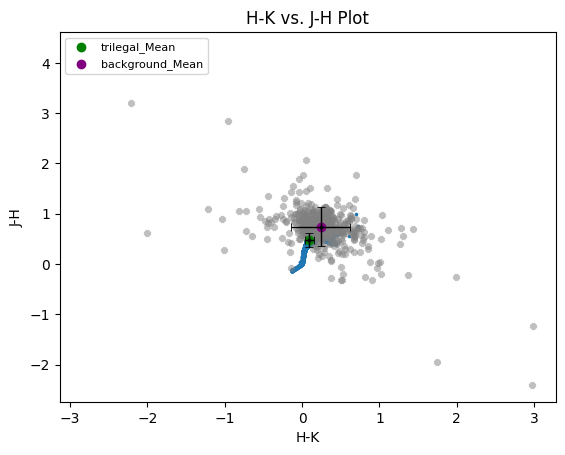

In [40]:
plt.scatter(h_k,j_h,s=10,marker='.',zorder=1)
plt.scatter(h_k_mean, j_h_mean, color='green', label='trilegal_Mean',zorder=3)
plt.errorbar (h_k_mean, j_h_mean, xerr=h_k_std, yerr=j_h_std,marker='x',c='black', lw=1,
                capsize=3, elinewidth=1, capthick=0.6, markersize=2, zorder=5)
plt.scatter(hmk1, jmh1, s=12, marker='x', c= 'grey', alpha=0.5, linewidths=3 ,zorder=2,)
plt.scatter(hmk1_mean, jmh1_mean, color='purple', label='background_Mean',zorder=4)
plt.errorbar (hmk1_mean, jmh1_mean, xerr=hmk1_std, yerr=jmh1_std,marker='x',c='black', lw=1,
                capsize=3, elinewidth=1, capthick=0.6, markersize=2, zorder=6)
plt.legend(loc='upper left', fontsize=8)
plt.xlabel("H-K")
plt.ylabel("J-H")
plt.title("H-K vs. J-H Plot")

In [41]:
if df1.iloc[0, 4] < 1:
    x111 = df3.iloc[0, 54]
    x222 = df3.iloc[0, 55]
    y111 = df3.iloc[0, 56]
    y222 = df3.iloc[0, 57]
    sx=df3.iloc[0, 64]
    sy=df3.iloc[0, 65]
    ex=df3.iloc[0, 66]
    ey=df3.iloc[0, 67]
else:
    x111 = df3.iloc[0, 56]
    x222 = df3.iloc[0, 57]
    y111 = df3.iloc[0, 58]
    y222 = df3.iloc[0, 59]
    sx=df3.iloc[0, 66]
    sy=df3.iloc[0, 67]
    ex=df3.iloc[0, 68]
    ey=df3.iloc[0, 69]

In [42]:
# x111 = -0.5
#x222 = 1.6
# y111 = -0.5
# y222 = 4.0
# sx=1.5
# sy=0.0
# ex=1.6
# ey=0.0

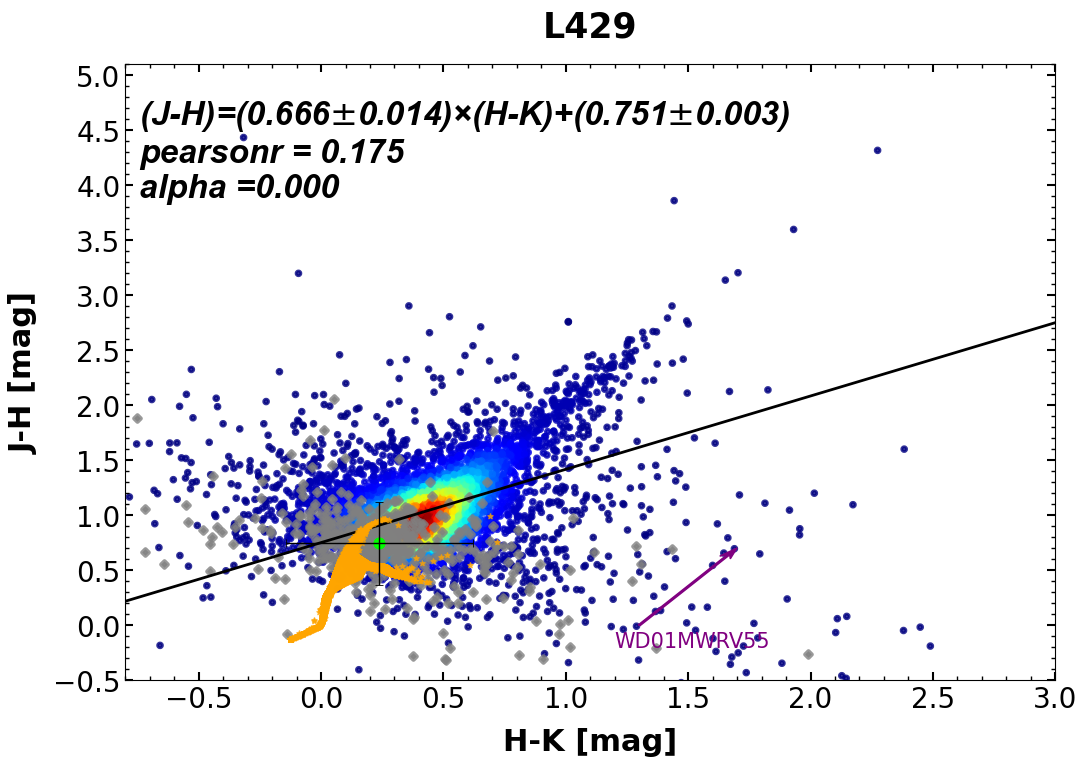

In [44]:


fig1, ax = plt.subplots(figsize=(12, 8))
ax.scatter(hmk, jmh, s= 12, marker='o', c= z,cmap='jet', alpha=0.8, linewidths=2 , zorder=1,)
ax.scatter(hmk1, jmh1, s=11, marker='D', c= 'grey', alpha=0.8, linewidths=3 ,zorder=2,)
ax.scatter(h_k,j_h,s=15,marker='*',c='orange',alpha=0.7 ,zorder=3 ,)
ax.scatter(hmk1_mean, jmh1_mean, s=60,marker='o',color='lime',zorder=4)
ax.errorbar (hmk1_mean, jmh1_mean,marker='', xerr=hmk1_std, yerr=jmh1_std,c='black', lw=1,
                capsize=3, elinewidth=1, capthick=0.6, zorder=5)

ax.set_xlim(x111,x222),ax.set_ylim(y111,y222)



ax.set_xlabel('H-K [mag]', fontsize=22,fontweight ='bold',labelpad=10)
ax.set_ylabel('J-H [mag]', fontsize=22,fontweight ='bold',labelpad=10)
ax.set_title(Y, fontsize=25,fontweight ='bold',pad=20)

xlist = np.linspace(-5, 5, 300, endpoint=True, retstep=False)
ylist_1 = p.ab[0] + p.ab[1] * (xlist - np.median(hmk))

ax.plot(xlist, ylist_1, linestyle='-', lw=2, c='black', 
        label=f'(J-H)=({p.ab[1]:.3f}$\\pm${p.ab_err[1]:.3f})×(H-K)+({p.ab[0]-p.ab[1]*pivot:.3f}$\\pm${p.ab_err[0]:.3f})\npearsonr = {p.pearsonr[0]:.3f}\nalpha ={alpha10:.3f}')

font = {'family': 'Arial', 'style': 'italic', 'weight': 'bold', 'size': 24}



start_x,start_y = sx, sy  #起始坐标
slope = 1.75699  # 箭斜率

le=0.4
arrow_length = le # 合适的长度值
end_x = start_x + arrow_length
end_y = start_y + arrow_length * slope
# 需要将箭头的总长度投影到x和y轴上，得到dx和dy
dx = end_x - start_x
dy = end_y - start_y

plt.arrow(start_x, start_y, dx, dy, width=0.01, length_includes_head=True, 
          color='purple', head_width=0.05, head_length=0.1, overhang=0.3)


plt.text(ex, ey, 'WD01MWRV55', fontsize=15, color='purple')


legend = ax.legend(loc=(-0.1, 0.75), fontsize=5,frameon=0,prop=font)
legend.get_lines()[0].set_visible(False)


ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=20)
ax.tick_params(which='major', length=6, width=1.5)
ax.tick_params(which='minor', length=3, width=1)

# 设置x轴的主刻度线为0.5的倍数
ax.xaxis.set_major_locator(MultipleLocator(0.5))

# 设置x轴的次刻度线为0.1的倍数
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# 设置y轴的主刻度线为0.5的倍数
ax.yaxis.set_major_locator(MultipleLocator(0.5))

# 设置y轴的次刻度线为0.1的倍数
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
# plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig(full_file3_path)
    

In [44]:

# fig2= plt.figure(num=2,figsize=(12,8))
# ax = plt.subplot (1,1,1)
# plt.errorbar (hmk, jmh, xerr=hmk_err, yerr=jmh_err,marker='x',c='black', lw=0,
#                capsize=3, elinewidth=0.2, capthick=0.6, markersize=2, zorder=1)
# ax.scatter(hmk,jmh, c= z, cmap='jet',s=n, zorder=2,marker='o')

# # # ax.set_xlim(-3,3),ax.set_ylim(-3,3)
# ax.set_xlim(-0.5,1.5),ax.set_ylim(0,2.5)

# ax.set_xlabel('H-K [mag]', fontsize=22,fontweight ='bold',labelpad=10)
# ax.set_ylabel('J-H [mag]', fontsize=22,fontweight ='bold',labelpad=10)
# ax.set_title(Y, fontsize=25,fontweight ='bold',pad=20)

# xlist = np.linspace(-5, 5, 300, endpoint=True, retstep=False)
# ylist_1 = p.ab[0] + p.ab[1] * (xlist - np.median(hmk))

# ax.plot(xlist, ylist_1, linestyle='-', lw=2, c='black', 
#         label=f'(J-H)=({p.ab[1]:.3f}$\pm${p.ab_err[1]:.3f})×(H-K)+({p.ab[0]-p.ab[1]*pivot:.3f}$\pm${p.ab_err[0]:.3f})\npearsonr = {p.pearsonr[0]:.3f}\nalpha ={a:.4f}')



# font = {'family': 'Arial', 'style': 'italic', 'weight': 'bold', 'size': 24}
# legend = ax.legend(loc=(-0.1, 0.75), fontsize=24,frameon=0,prop=font)
# legend.get_lines()[0].set_visible(False)

# from matplotlib.ticker import MultipleLocator
# ax.tick_params(direction='in', which='both', bottom=True, top=True, left=True, right=True, labelsize=20)
# ax.tick_params(which='major', length=6, width=1.5)
# ax.tick_params(which='minor', length=3, width=1)

# # 设置x轴的主刻度线为0.5的倍数
# ax.xaxis.set_major_locator(MultipleLocator(0.5))

# # 设置x轴的次刻度线为0.1的倍数
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# # 设置y轴的主刻度线为0.5的倍数
# ax.yaxis.set_major_locator(MultipleLocator(0.5))

# # 设置y轴的次刻度线为0.1的倍数
# ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# #画2.6sigma
# xseq = np.linspace(-5, 5, 300)
# y0 = p.coef[0] + p.coef[1]*(xseq - pivot)

# xline = p.xline
# plt.plot(xseq, y0 + 2.6*p.rms,color='black',label='2.6sigam',linestyle='--')
# plt.plot(xseq, y0 - 2.6*p.rms,color='black',label='2.6sigma',linestyle='--')


# #设置直线以外的颜色为灰色
# _y0 = p.coef[0] + p.coef[1]*(hmk - pivot)
# mask2 = (jmh < _y0 - 2.6 * p.rms) | (jmh > _y0 + 2.6 * p.rms)
# ax.scatter(hmk[mask2],jmh[mask2],s=n, marker='o', c='gray', alpha=1, linewidths=2, zorder=2)



# plt.savefig(full_file4_path)
            

In [45]:
mean_hmkvalue = np.mean(hmk)
max_hmkvalue = np.max(hmk)
median_hmkvalue = np.median(hmk)
mean_jmhvalue = np.mean(jmh)
max_jmhvalue = np.max(jmh)
median_jmhvalue = np.median(jmh)

In [46]:
# #不行，为了让表格代码好好运行，必须定一个b1...，因为没三色图
# b1=1.0 
# b2=99.56
# g1=1.0 
# g2=99.56
# r1=1.0
# r2=99.64
# #不行，为了让表格代码好好运行，必须定一个textra...，因为没远红图
# text_ra = i #'4:04:15.000'  # 举例天体坐标的赤经部分
# text_dec = o

In [47]:

datax = pd.DataFrame()


datax['源数']=[data.shape[0]]
datax['背景源数']=[data1.shape[0]]
if df1.iloc[0, 4] < 1:
    datax['修改后所圈中心度数_ra']=[i]
    datax['修改后所圈中心度数_dec']=[o]
    datax['修改后所圈中心_ra']=[center_edit_ra]
    datax['修改后所圈中心_dec']=[center_edit_dec]
    datax['修改后所圈radius']=[radius_edit]
else:
    datax['修改后所圈中心度数_ra']=[i]
    datax['修改后所圈中心度数_dec']=[o]
    datax['修改后所圈中心_ra']=[center_edit_ra]
    datax['修改后所圈中心_dec']=[center_edit_dec]  
    datax['修改后所圈宽度']=[width_edit.value]  
    datax['修改后所圈高度']=[height_edit.value]  
    datax['修改后所圈角度']=[angle_edit.value] 
datax['修改后所圈中心度数_l']=[galactic_coord.l.degree]
datax['修改后所圈中心度数_b']=[galactic_coord.b.degree]
datax['选择所圈中心度数_ra']=[n]
datax['选择所圈中心度数_dec']=[m]
datax['选择所圈中心_ra']=[A]
datax['选择所圈中心_dec']=[B]  
datax['选择所圈宽度']=[C.value]  
datax['选择所圈高度']=[D.value]  
datax['选择所圈角度']=[angle0.value] 
datax['拟合后斜率'] = [p.ab[1]]
datax['拟合后截距'] = [p.ab[0]-p.ab[1]*pivot]
datax['拟合后斜率误差'] = [p.ab_err[1]]
datax['拟合后截距误差'] = [p.ab_err[0]]
datax['pearson系数'] = [p.pearsonr[0]]
datax['person_pvalue'] = [p.pearsonr[1]]
datax['spearmanr系数'] = [p.spearmanr[0]]
datax['spearmanr_pvalue'] = [p.spearmanr[1]]
datax['rms'] = [p.rms]
datax['scatter'] = [p.sig_int]
datax['scatter_err'] = [p.sig_int_err]
datax['pivot'] = [np.median(hmk)]
datax['hmk_mean'] = [mean_hmkvalue]
datax['jmh_mean'] = [mean_jmhvalue]
datax['hmk_median'] = [median_hmkvalue]
datax['jmh_median'] = [median_jmhvalue]
datax['hmk_max'] = [max_hmkvalue]
datax['jmh_max'] = [max_jmhvalue]
datax['TRILEGAL_H-K Mean'] = [h_k_mean]
datax['TRILEGAL_J-H Mean'] = [j_h_mean]
datax['TRILEGAL_H-K Median'] = [h_k_median]
datax['TRILEGAL_J-H Median'] = [j_h_median]
datax['TRILEGAL_H-K Max'] = [h_k_max]
datax['TRILEGAL_J-H Max'] = [j_h_max]
datax['TRILEGAL_H-K Standard Deviation'] = [h_k_std]
datax['TRILEGAL_J-H Standard Deviation'] = [j_h_std]
datax['background_H-K_mean'] = [hmk1_mean]
datax['background_J-H_mean'] = [jmh1_mean]
datax['background_H-K_median'] = [hmk1_median]
datax['background_J-H_median'] = [jmh1_median]
datax['background_H-K_max'] = [hmk1_max]
datax['background_J-H_max'] = [jmh1_max]
datax['background_J-H_Standard Deviation'] = [hmk1_std]
datax['background_H-K_Standard Deviation'] = [jmh1_std]
datax['alpha1'] = [alpha1]
datax['alpha10'] = [alpha10]
datax['alpha0.1'] = [alpha0]
datax['alpha'] = [alpha10]
datax['画图范围x1'] = [x111]
datax['画图范围x2'] = [x222]
datax['画图范围y1'] = [y111]
datax['画图范围y2'] = [y222]
datax['三色图范围b1'] = [b1]
datax['三色图范围b2'] = [b2]
datax['三色图范围g1'] = [g1]
datax['三色图范围g2'] = [g2]
datax['三色图范围r1'] = [r1]
datax['三色图范围r2'] = [r2]
datax['箭头开始x'] = [sx]
datax['箭头开始y'] = [sy]
datax['文本位置x'] = [ex]
datax['文本位置y'] = [ey]
datax['箭头长度'] = [le]
datax['远红外图的文本ra'] =  [text_ra]
datax['远红外图的文本dec'] = [text_dec]
datax['宽'] =  [w1]
datax['高'] =  [h1]
datax_values = datax.values.tolist()
wb = Workbook()
ws = wb.active
for row in datax_values:
    ws.append(row)
wb.save(full_file7_path)